# Case Ifood
*Desenvolvido por Mário de Deus*

# Installs

# Imports

In [1]:
# 1. Instalação (caso não tenha)
!pip install pycaret

In [2]:
import numpy as np
import pandas as pd
import joblib
# import seaborn as sns
# import shap

from pycaret.classification import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_colwidth', 1000)

import warnings
warnings.filterwarnings('ignore')

# Descrição / Objetivo do problema

* O objetivo

O objetivo da equipe é construir um modelo preditivo que produzirá o maior lucro para a próxima campanha de marketing direto, programada para o próximo mês. A nova campanha, sexta, visa a venda de um novo gadget para clientes cadastrados no Banco de Dados da empresa. Para construir o modelo, foi realizada uma campanha piloto envolvendo 2.240 clientes. Os clientes foram selecionados aleatoriamente e contatados por telefone para a aquisição do gadget. Durante os meses seguintes, os clientes que compraram a oferta foram devidamente etiquetados. O custo total da campanha da amostra foi de 6,720MU e a receita gerada pelos clientes que aceitaram a oferta foi de 3,674MU. Globalmente, a campanha teve um lucro de -3,046MU. A taxa de sucesso da campanha foi de 15%. O objetivo da equipe é desenvolver um modelo que preveja o comportamento do cliente e aplicá-lo ao restante da base de clientes. Felizmente, o modelo permitirá que a empresa escolha a dedo os clientes com maior probabilidade de comprar a oferta, deixando de fora os não respondentes, tornando a próxima campanha altamente lucrativa. Além disso, além de maximizar o lucro da campanha, o CMO está interessado em estudar as características dos clientes que desejam comprar o gadget.
Os dados
O conjunto de dados contém características sociodemográficas e firográficas de cerca de 2.240 clientes contatados. Além disso, contém um sinalizador para aqueles clientes que responderam à campanha, comprando o produto.


# Data Loading

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
#Google COlab
# df = pd.read_csv('/content/drive/MyDrive/Front End e Mobile Development/2024/20240318 - Aula06/data.csv',encoding='utf-8')

#Jupyter
df = pd.read_csv('data.csv',encoding='utf-8')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Data Cleaning

Drop da feature ID por ser um identificador

In [4]:
df.drop('ID',axis = 1, inplace = True, errors = 'ignore')
df.shape

(2240, 28)

## Features com valores unicos
Verificando a existência de features com valores únicos (devem ser dropadas por não contribuirem para a explicar a variação da feature target)

In [5]:
df.nunique().sort_values()

,0
Z_Revenue,1
Z_CostContact,1
Response,2
AcceptedCmp3,2
AcceptedCmp4,2
AcceptedCmp5,2
AcceptedCmp2,2
AcceptedCmp1,2
Complain,2
Teenhome,3


In [6]:
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace = True, errors = 'ignore')

## NaN analysis

In [7]:
df.isna().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0
MntFruits,0


Somente a feature Income possui valores nulos.
Analisando as linhas com valores nulos em relação aos valores da feature target

In [8]:
#Distribuição da feature Response entre as amostras com Income = NaN
df[df.Income.isna()].Response.value_counts()

,count
Response,
0,23
1,1


In [9]:
# Proporção de 0 e 1 da feature Response no df completo
df.Response.value_counts(normalize = True)

,proportion
Response,
0,0.850893
1,0.149107


In [10]:
print('% amostras com NaN: ',np.round((df.Income.isna().sum()/len(df))*100,2))
print('% amostras com NaN e Response = 1: ',
      np.round((( len(df[(df.Income.isna()) & (df.Response == 1)]) / len(df))*100),2))

% amostras com NaN:  1.07
% amostras com NaN e Response = 1:  0.04


Dado que as 24 linhas com valores Nan representam 1% do dataset total, e que entre as 24 linhas com Income == Nan somente uma apresentou Response == 1 (0.04%), as 24 linhas serão dropadas

In [11]:
print('Shape antes do dropna: ',df.shape[0])
df.dropna(axis=0,inplace = True)
print('Shape após o dropna: ',df.shape[0])

Shape antes do dropna:  2240
Shape após o dropna:  2216


## Ajuste do dtypes

In [12]:
df = df.convert_dtypes()
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
df.Response = df.Response.astype('bool')
df.dtypes

,0
Year_Birth,Int64
Education,string[python]
Marital_Status,string[python]
Income,Int64
Kidhome,Int64
Teenhome,Int64
Dt_Customer,datetime64[ns]
Recency,Int64
MntWines,Int64
MntFruits,Int64


# Feature Engineering

## Idade dos clientes

In [13]:
from datetime import datetime

ano_atual = datetime.now().year  # ← CORRIGIDO aqui
df['Age'] = ano_atual - df.Year_Birth
df.drop('Year_Birth', axis=1, errors='ignore', inplace=True)
df.head()


,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,True,68
1,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,False,71
2,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,False,60
3,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,False,41
4,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,False,44


## Tempo como cliente

In [14]:
from datetime import datetime

df['Time_Customer'] = (datetime.now() - pd.to_datetime(df['Dt_Customer'])).dt.days / 365.25
print(df[['Dt_Customer', 'Time_Customer']].head())
df.drop('Dt_Customer', axis=1, inplace=True)


  Dt_Customer  Time_Customer
0  2012-09-04      12.605065
1  2014-03-08      11.099247
2  2013-08-21      11.644079
3  2014-02-10      11.170431
4  2014-01-19      11.230664


### Removendo valores incoerentes com a variável Marital_Status

In [15]:
index_to_drop = df[(df['Marital_Status'] =='YOLO') | (df['Marital_Status'] =='Absurd') | (df['Marital_Status'] =='absurd') | (df['Marital_Status'] == 'Alone')].index
df.drop(index_to_drop,inplace = True)
df = df.reset_index(drop = True)
df.Marital_Status.value_counts()
print(df.shape)

(2209, 26)


In [16]:
df.rename(columns={'Response':'z_Response'},inplace = True)
cols = df.columns.sort_values()
df = df[cols]
df.rename(columns={'z_Response':'Response'},inplace = True)

df.columns

Index(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Age', 'Complain', 'Education', 'Income', 'Kidhome',
       'Marital_Status', 'MntFishProducts', 'MntFruits', 'MntGoldProds',
       'MntMeatProducts', 'MntSweetProducts', 'MntWines',
       'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'Recency', 'Teenhome',
       'Time_Customer', 'Response'],
      dtype='object')

# Preparação do dataset para Modelagem


## Train Test Validation Split

In [17]:
# sample 5% of data to be used as unseen data
df_train_test = df.sample(frac=0.95, random_state=123)
df_valid = df.drop(df_train_test.index)
df_train_test.reset_index(inplace=True, drop=True)
df_valid.reset_index(inplace=True, drop=True)
# print the revised shape
print('Data for Modeling: ' + str(df_train_test.shape))
print('Unseen Data For Predictions: ' + str(df_valid.shape))

Data for Modeling: (2099, 26)
Unseen Data For Predictions: (110, 26)


# Auto ML - PYCARET

**Para o problema de negócio em questão, a métrica Precision é a mais relevante.**

In [18]:
df_train_test.dtypes

,0
AcceptedCmp1,Int64
AcceptedCmp2,Int64
AcceptedCmp3,Int64
AcceptedCmp4,Int64
AcceptedCmp5,Int64
Age,Int64
Complain,Int64
Education,string[python]
Income,Int64
Kidhome,Int64


## Setup

In [19]:
s = setup(data = df_train_test,
          target = 'Response',
          fix_imbalance = True,
          remove_outliers = True,
          categorical_features = ['Education', 'Marital_Status'],
          session_id = 123)

,Description,Value
0,Session id,123
1,Target,Response
2,Target type,Binary
3,Original data shape,"(2099, 26)"
4,Transformed data shape,"(3072, 34)"
5,Transformed train set shape,"(2442, 34)"
6,Transformed test set shape,"(630, 34)"
7,Numeric features,23
8,Categorical features,2
9,Preprocess,True


In [20]:
# check available models
#has to be called necessary only after having defined a setup.
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessClassifier,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## Comparativo entre Modelos

In [21]:
best_model = compare_models(sort = 'auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8121,0.9005,0.8099,0.4380,0.5669,0.4613,0.4976,0.2370
lda,Linear Discriminant Analysis,0.8128,0.9004,0.8099,0.4389,0.5677,0.4624,0.4985,0.3720
gbc,Gradient Boosting Classifier,0.8741,0.8916,0.4478,0.6165,0.5155,0.4455,0.4548,1.2370
lightgbm,Light Gradient Boosting Machine,0.8727,0.8863,0.3802,0.6329,0.4700,0.4034,0.4229,3.5050
xgboost,Extreme Gradient Boosting,0.8836,0.8862,0.4933,0.6590,0.5573,0.4925,0.5032,0.5800
rf,Random Forest Classifier,0.8836,0.8784,0.3802,0.7094,0.4914,0.4333,0.4618,0.7930
ada,Ada Boost Classifier,0.8632,0.8658,0.5524,0.5535,0.5485,0.4685,0.4711,0.5850
et,Extra Trees Classifier,0.8870,0.8536,0.3798,0.7532,0.5003,0.4448,0.4803,0.4920
qda,Quadratic Discriminant Analysis,0.7675,0.8300,0.6567,0.4176,0.4919,0.3755,0.3908,0.2350
lr,Logistic Regression,0.7338,0.8086,0.7008,0.3223,0.4403,0.2959,0.3359,1.2090


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [22]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)


## Análise do Modelo

In [23]:
#evaluate model
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

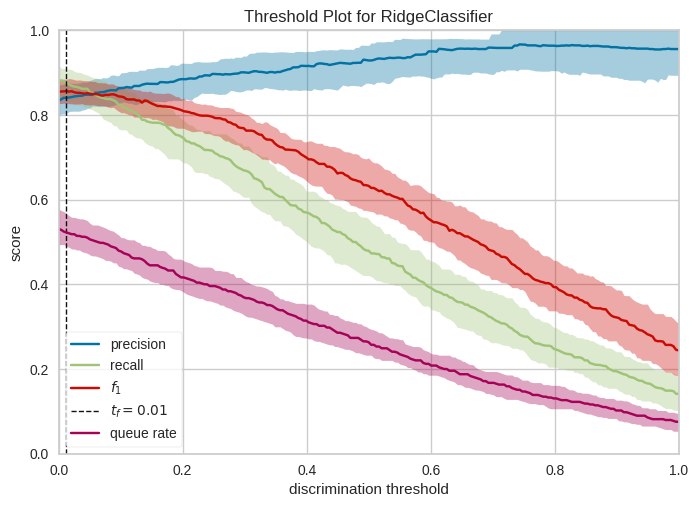

In [24]:
#plot model - treshold
plot_model(best_model, plot = 'threshold')

In [ ]:
#plot model - auc
#plot_model(best_model, plot = 'auc')

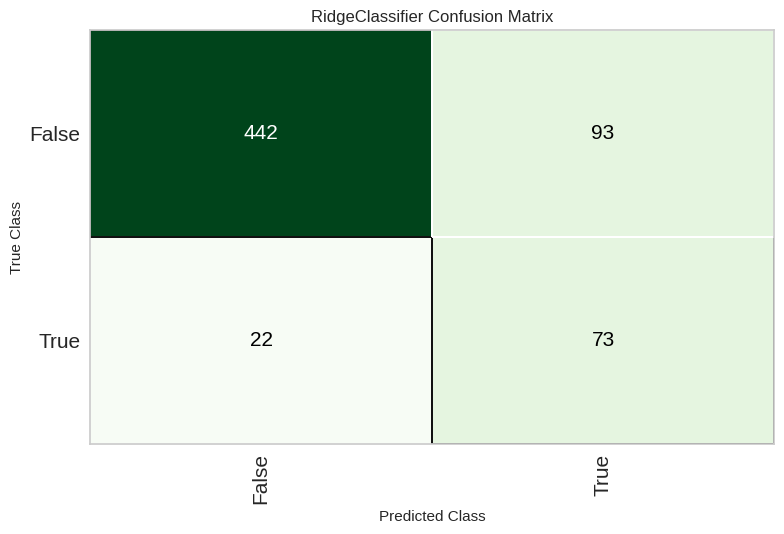

In [25]:
#plot model - confusion matrix
plot_model(best_model, plot = 'confusion_matrix')

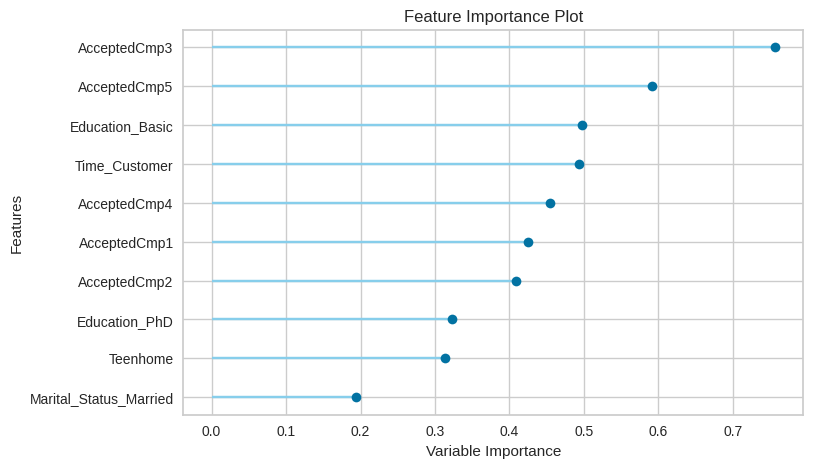

In [26]:
#plot model - feature
plot_model(best_model, plot = 'feature')

In [27]:
#predict model - raw score
predict_model(best_model, raw_score= True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8175,0.7973,0.7684,0.4398,0.5594,0.4548,0.4830


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Income,Kidhome,...,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Time_Customer,Response,prediction_label
1869,0,0,0,0,0,66,0,PhD,67786,0,...,6,1,6,3,1,0,0,11.348392,True,1
1782,0,0,0,0,0,61,0,PhD,31686,1,...,0,2,3,1,6,31,1,10.855578,False,0
1944,0,0,0,0,0,75,0,PhD,59292,0,...,5,2,8,3,3,71,1,11.832991,False,0
1670,0,0,1,0,0,55,0,PhD,38097,1,...,2,4,2,3,7,70,1,12.492813,True,1
1219,0,0,0,0,0,49,0,Master,49681,0,...,1,6,7,7,7,66,2,11.438741,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0,0,0,0,0,50,0,Graduation,37085,1,...,0,4,3,3,8,65,1,10.798083,False,0
1923,1,0,0,0,0,60,0,Graduation,81168,0,...,4,1,7,6,3,84,0,10.934976,False,0
1523,0,0,0,0,0,47,0,2n Cycle,52195,2,...,0,1,2,1,8,2,1,10.921287,False,0
641,0,0,0,0,0,56,0,Graduation,4428,0,...,0,0,0,25,1,0,1,11.520876,False,0


* Outros tipos de plot:
https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.plot_model

## Criando um Modelo

In [28]:
#create model rf
mdl_rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8367,0.8771,0.1818,0.4000,0.2500,0.1726,0.1896
1,0.9184,0.9135,0.5909,0.8125,0.6842,0.6387,0.6494
2,0.8912,0.8705,0.4091,0.7500,0.5294,0.4738,0.5017
3,0.8844,0.8785,0.4545,0.6667,0.5405,0.4771,0.4885
4,0.8844,0.9189,0.3636,0.7273,0.4848,0.4278,0.4605
5,0.8776,0.8260,0.3636,0.6667,0.4706,0.4081,0.4321
6,0.8707,0.8682,0.3182,0.6364,0.4242,0.3604,0.3880
7,0.8707,0.8165,0.3182,0.6364,0.4242,0.3604,0.3880
8,0.8912,0.8896,0.3478,0.8889,0.5000,0.4517,0.5149


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Tuning dos Hiperparâmetros

### RF

In [29]:
tuned_rf = tune_model(mdl_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8647,0.4545,0.5263,0.4878,0.4053,0.4068
1,0.9116,0.9102,0.6818,0.7143,0.6977,0.6459,0.6462
2,0.8844,0.8604,0.5455,0.6316,0.5854,0.5186,0.5205
3,0.8707,0.8705,0.5455,0.5714,0.5581,0.4825,0.4827
4,0.9252,0.9487,0.5909,0.8667,0.7027,0.6616,0.6775
5,0.8503,0.8538,0.4545,0.5000,0.4762,0.3891,0.3897
6,0.8639,0.8840,0.5000,0.5500,0.5238,0.4447,0.4453
7,0.8571,0.8142,0.3636,0.5333,0.4324,0.3540,0.3626
8,0.8980,0.8604,0.5652,0.7222,0.6341,0.5759,0.5817


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [30]:
#predict rf
#mdl_rf com e sem tuning apresentaram AUC e desvio padrao (STD) praticamente iguais.
predict_model(mdl_rf, raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8746,0.8983,0.3789,0.6429,0.4768,0.4109,0.4295


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Income,Kidhome,...,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Time_Customer,Response,prediction_label,prediction_score_0,prediction_score_1
1869,0,0,0,0,0,66,0,PhD,67786,0,...,6,3,1,0,0,11.348392,True,0,0.6000,0.4000
1782,0,0,0,0,0,61,0,PhD,31686,1,...,3,1,6,31,1,10.855578,False,0,1.0000,0.0000
1944,0,0,0,0,0,75,0,PhD,59292,0,...,8,3,3,71,1,11.832991,False,0,0.9600,0.0400
1670,0,0,1,0,0,55,0,PhD,38097,1,...,2,3,7,70,1,12.492813,True,0,0.5383,0.4617
1219,0,0,0,0,0,49,0,Master,49681,0,...,7,7,7,66,2,11.438741,False,0,0.9800,0.0200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0,0,0,0,0,50,0,Graduation,37085,1,...,3,3,8,65,1,10.798083,False,0,0.9950,0.0050
1923,1,0,0,0,0,60,0,Graduation,81168,0,...,7,6,3,84,0,10.934976,False,0,0.8667,0.1333
1523,0,0,0,0,0,47,0,2n Cycle,52195,2,...,2,1,8,2,1,10.921287,False,0,0.9867,0.0133
641,0,0,0,0,0,56,0,Graduation,4428,0,...,0,25,1,0,1,11.520876,False,0,0.8850,0.1150


In [31]:
print(mdl_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [32]:
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [33]:
#predict rf
predict_model(tuned_rf, raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8746,0.8983,0.3789,0.6429,0.4768,0.4109,0.4295


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Income,Kidhome,...,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Time_Customer,Response,prediction_label,prediction_score_0,prediction_score_1
1869,0,0,0,0,0,66,0,PhD,67786,0,...,6,3,1,0,0,11.348392,True,0,0.6000,0.4000
1782,0,0,0,0,0,61,0,PhD,31686,1,...,3,1,6,31,1,10.855578,False,0,1.0000,0.0000
1944,0,0,0,0,0,75,0,PhD,59292,0,...,8,3,3,71,1,11.832991,False,0,0.9600,0.0400
1670,0,0,1,0,0,55,0,PhD,38097,1,...,2,3,7,70,1,12.492813,True,0,0.5383,0.4617
1219,0,0,0,0,0,49,0,Master,49681,0,...,7,7,7,66,2,11.438741,False,0,0.9800,0.0200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0,0,0,0,0,50,0,Graduation,37085,1,...,3,3,8,65,1,10.798083,False,0,0.9950,0.0050
1923,1,0,0,0,0,60,0,Graduation,81168,0,...,7,6,3,84,0,10.934976,False,0,0.8667,0.1333
1523,0,0,0,0,0,47,0,2n Cycle,52195,2,...,2,1,8,2,1,10.921287,False,0,0.9867,0.0133
641,0,0,0,0,0,56,0,Graduation,4428,0,...,0,25,1,0,1,11.520876,False,0,0.8850,0.1150


## AUC Plot

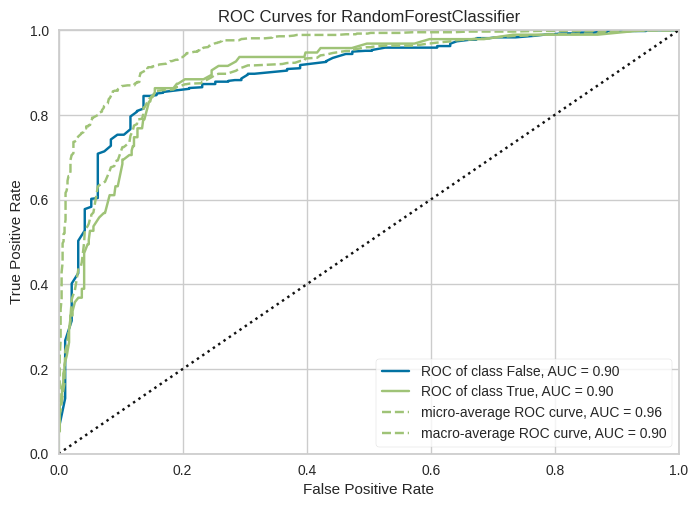

In [34]:
#auc
plot_model(tuned_rf, plot = 'auc')

## Feature Importance

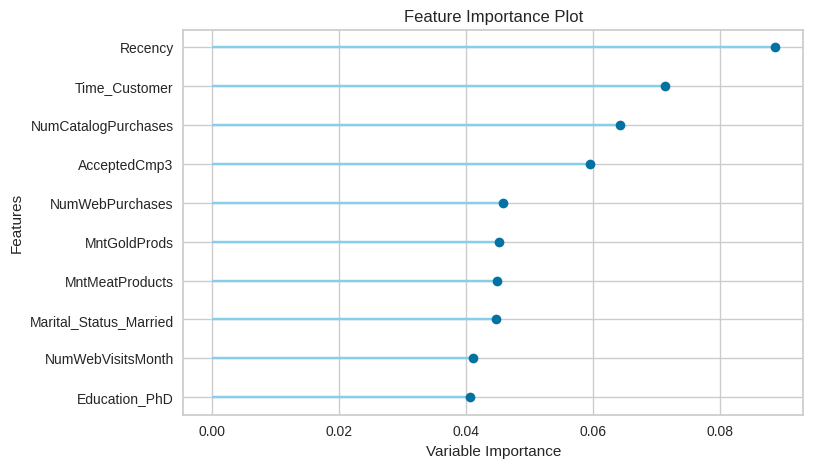

In [35]:
#feature
plot_model(tuned_rf, plot = 'feature')

## Matriz de Confusão

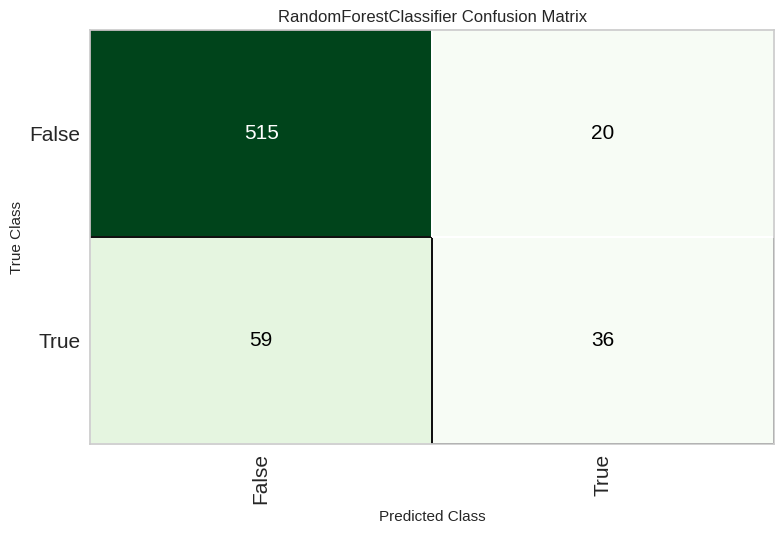

In [36]:
#confusion matrix
plot_model(tuned_rf, plot = 'confusion_matrix')

## Save Model

In [37]:
import os

# Cria as pastas se não existirem
os.makedirs('./deploy/pickle/', exist_ok=True)

# Agora salva o modelo
save_model(mdl_rf, './deploy/pickle/pickle_rf_pycaret2')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['AcceptedCmp1', 'AcceptedCmp2',
                                              'AcceptedCmp3', 'AcceptedCmp4',
                                              'AcceptedCmp5', 'Age', 'Complain',
                                              'Income', 'Kidhome',
                                              'MntFishProducts', 'MntFruits',
                                              'MntGoldProds', 'MntMeatProducts',
                                              'MntSweetProducts', 'MntWines',
                                              'NumCatalogPurchases',
                                              'NumDealsPurchase...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         ma

In [38]:
cols_x_test = get_config(variable="X_test").columns
cols_x_test

Index(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Age', 'Complain', 'Education', 'Income', 'Kidhome',
       'Marital_Status', 'MntFishProducts', 'MntFruits', 'MntGoldProds',
       'MntMeatProducts', 'MntSweetProducts', 'MntWines',
       'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'Recency', 'Teenhome',
       'Time_Customer'],
      dtype='object')

In [39]:
df_valid.drop('Response', axis = 1).to_csv('Xtest.csv', index = False)

In [40]:
df_valid

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Income,Kidhome,...,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Time_Customer,Response
0,0,0,0,0,0,41,0,Graduation,26646,1,...,11,0,2,4,2,6,26,0,11.170431,False
1,0,0,0,0,0,79,0,Graduation,37760,0,...,84,1,2,6,4,7,20,0,12.616016,False
2,0,0,0,0,0,40,0,Master,20559,1,...,13,0,2,3,2,8,88,0,12.087611,False
3,0,0,0,0,0,68,0,Graduation,65486,0,...,245,2,1,10,4,2,29,1,10.921287,False
4,0,0,0,0,0,61,0,Master,79143,0,...,650,9,1,13,6,3,2,0,12.670773,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0,0,0,0,47,0,Basic,26487,1,...,2,1,3,3,2,5,23,0,11.898700,False
106,0,0,0,0,0,42,0,Master,89616,0,...,671,5,1,12,7,2,36,0,12.128679,True
107,0,0,0,0,0,78,0,Graduation,27469,0,...,9,0,1,3,0,6,2,0,12.695414,False
108,0,0,0,0,0,30,0,2n Cycle,80617,0,...,594,6,1,8,4,2,42,0,12.501027,False


# Referências:
* https://towardsdatascience.com/introduction-to-binary-classification-with-pycaret-a37b3e89ad8d
* https://pycaret.gitbook.io/docs/get-started/quickstart#classification
* https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.plot_model

# CP 1:

✅ **Etapa 1 – Criação de novas features**

In [41]:
# CP1 – Feature Engineering

# 1. Total gasto em todos os produtos
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spent'] = df[product_cols].sum(axis=1)

# 2. Agrupamento de faixa etária
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '60+'])

# 3. Gasto médio por mês
df['Avg_Spent_per_Month'] = df['Total_Spent'] / (df['Time_Customer'] * 12 + 1)  # +1 para evitar divisão por zero

df[['Age', 'Age_Group', 'Total_Spent', 'Avg_Spent_per_Month']].head()


,Age,Age_Group,Total_Spent,Avg_Spent_per_Month
0,68,60+,1617,10.619938
1,71,60+,27,0.201206
2,60,46-60,776,5.514146
3,41,31-45,53,0.392461
4,44,31-45,422,3.108244


In [43]:
# Corrige espaços em valores de colunas categóricas
df['Education'] = df['Education'].str.replace(' ', '_')
df['Marital_Status'] = df['Marital_Status'].str.replace(' ', '_')
df['Age_Group'] = df['Age_Group'].astype(str).str.replace(' ', '_')


✅ **Etapa 2 – Novo setup() com as features criadas**

In [44]:
from pycaret.classification import setup

s2 = setup(
    data=df,
    target='Response',
    fix_imbalance=True,
    remove_outliers=True,
    normalize=True,
    feature_selection=True,
    ignore_features=['Income'],
    categorical_features=['Education', 'Marital_Status', 'Age_Group'],
    session_id=123
)


[LightGBM] [Info] Number of positive: 1285, number of negative: 1285
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7180
[LightGBM] [Info] Number of data points in the train set: 2570, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Description,Value
0,Session id,123
1,Target,Response
2,Target type,Binary
3,Original data shape,"(2209, 29)"
4,Transformed data shape,"(3233, 6)"
5,Transformed train set shape,"(2570, 6)"
6,Transformed test set shape,"(663, 6)"
7,Ignore features,1
8,Numeric features,24
9,Categorical features,3


✅ **Etapa 3 – Comparar novos modelos (AUC)**

In [45]:
# Comparar modelos com base na AUC
best_model_cp1 = compare_models(sort='AUC')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7484,0.8344,0.7705,0.3467,0.4772,0.3419,0.3902,1.3250
ridge,Ridge Classifier,0.7400,0.8331,0.7835,0.3399,0.4730,0.3347,0.3874,0.5400
lda,Linear Discriminant Analysis,0.7400,0.8331,0.7835,0.3399,0.4730,0.3347,0.3874,0.6690
qda,Quadratic Discriminant Analysis,0.7529,0.8273,0.7493,0.3492,0.4749,0.3409,0.3847,0.6710
svm,SVM - Linear Kernel,0.7141,0.8209,0.7920,0.3177,0.4517,0.3038,0.3643,0.6450
rf,Random Forest Classifier,0.8183,0.8152,0.5111,0.4066,0.4499,0.3432,0.3482,1.0800
gbc,Gradient Boosting Classifier,0.7963,0.8140,0.5750,0.3829,0.4541,0.3367,0.3507,1.0080
xgboost,Extreme Gradient Boosting,0.8267,0.8127,0.4583,0.4206,0.4347,0.3334,0.3360,0.7500
nb,Naive Bayes,0.7380,0.8089,0.7103,0.3264,0.4456,0.3038,0.3453,0.6010
et,Extra Trees Classifier,0.8163,0.8058,0.5192,0.4073,0.4547,0.3465,0.3513,0.7900


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**Tunar o modelo lr**

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7032,0.7665,0.6522,0.2830,0.3947,0.2368,0.2730
1,0.7677,0.9104,0.9565,0.3860,0.5500,0.4293,0.5097
2,0.7548,0.8157,0.7826,0.3529,0.4865,0.3544,0.4030
3,0.7548,0.8715,0.9130,0.3684,0.5250,0.3976,0.4721
4,0.7935,0.8748,0.8261,0.4043,0.5429,0.4291,0.4748
5,0.7548,0.8432,0.7917,0.3654,0.5000,0.3656,0.4135
6,0.7727,0.8304,0.6087,0.3500,0.4444,0.3144,0.3335
7,0.7208,0.7911,0.6522,0.3000,0.4110,0.2594,0.2931
8,0.6948,0.7803,0.6957,0.2857,0.4051,0.2453,0.2892


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


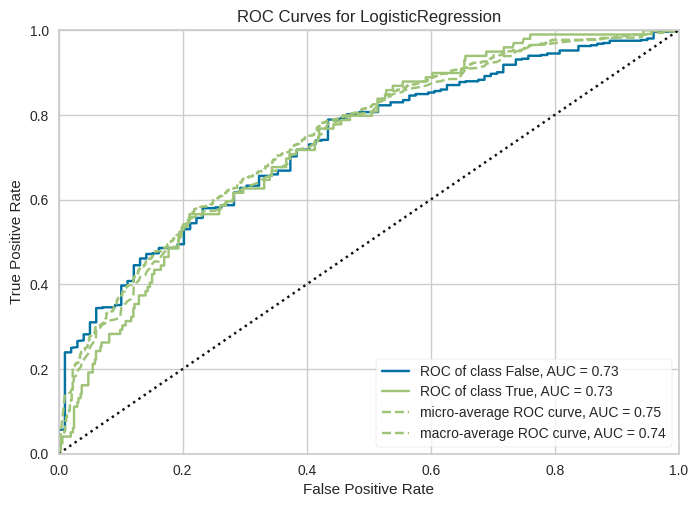

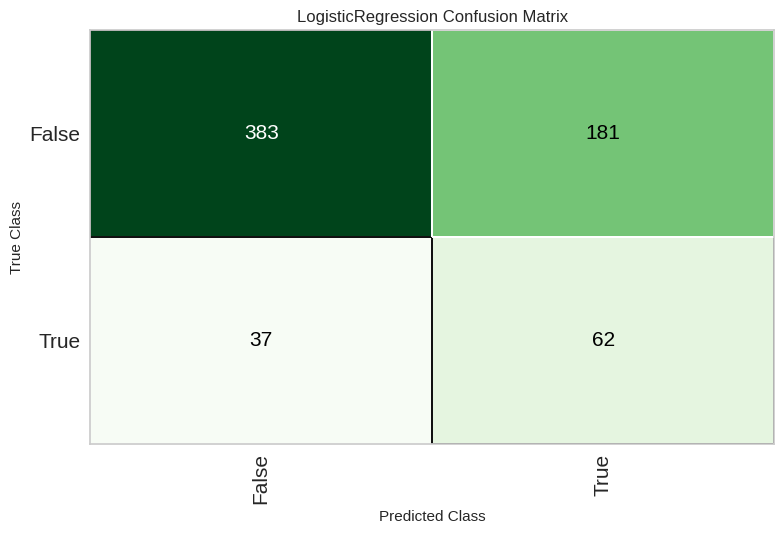

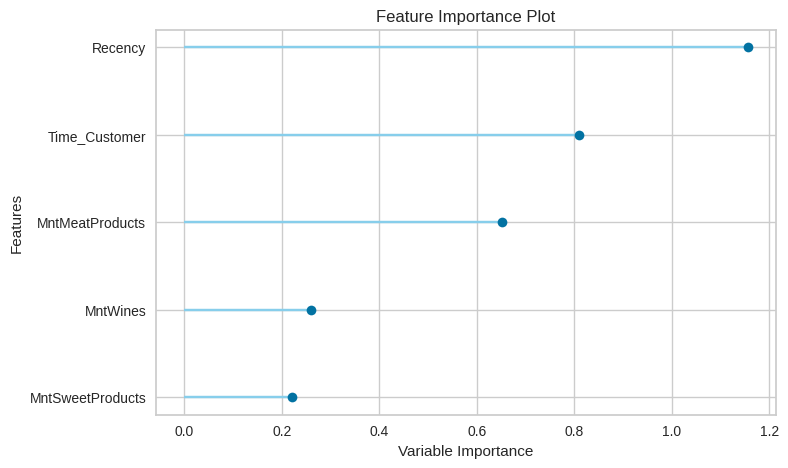

In [47]:
# Tunar o melhor modelo encontrado anteriormente
tuned_lr = tune_model(best_model_cp1, optimize='AUC')

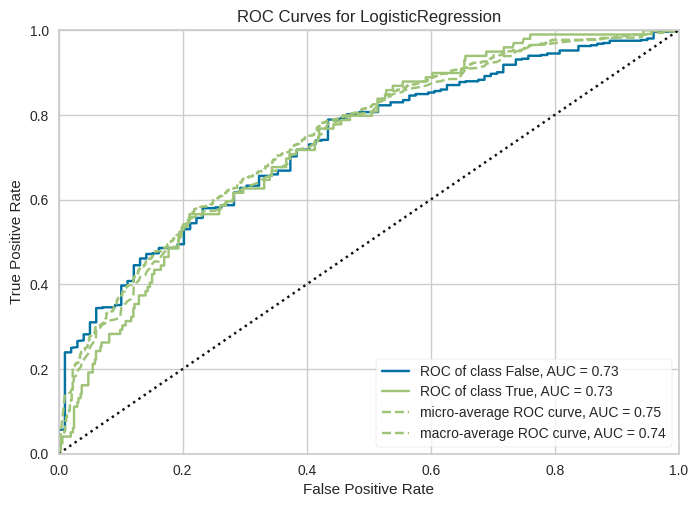

In [48]:
# Visualizações padrão após tunagem
plot_model(tuned_lr, plot='auc')

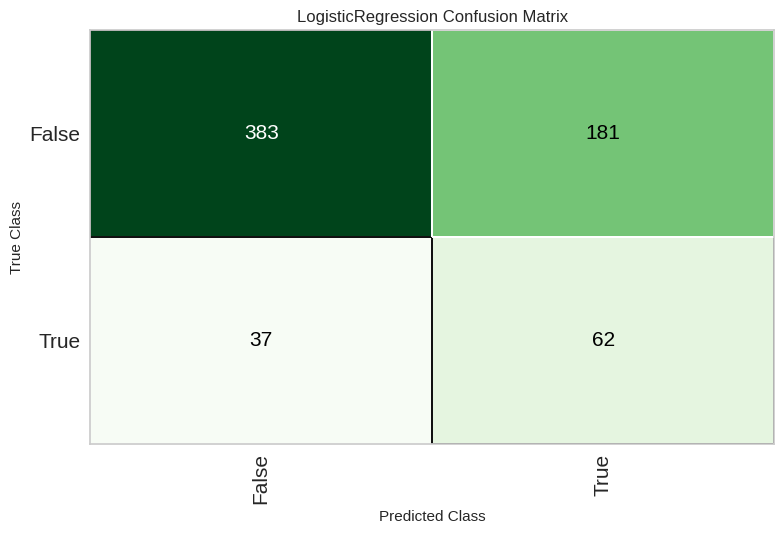

In [49]:
plot_model(tuned_lr, plot='confusion_matrix')

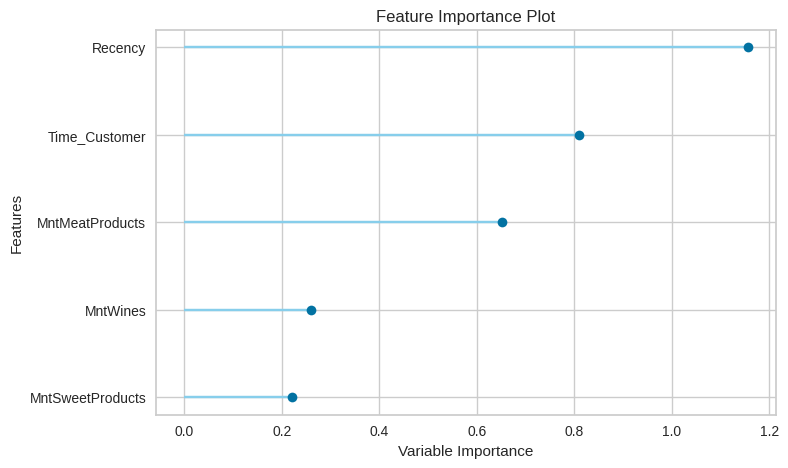

In [51]:
plot_model(tuned_lr, plot='feature')

Salvar modelo

In [52]:
save_model(tuned_lr, './deploy/pickle/pickle_lr_cp1')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['AcceptedCmp1', 'AcceptedCmp2',
                                              'AcceptedCmp3', 'AcceptedCmp4',
                                              'AcceptedCmp5', 'Age', 'Complain',
                                              'Kidhome', 'MntFishProducts',
                                              'MntFruits', 'MntGoldProds',
                                              'MntMeatProducts',
                                              'MntSweetProducts', 'MntWines',
                                              'NumCatalogPurchases',
                                              'NumDealsPurchases',
                                              'NumSt...
                                                                 importance_getter='auto',
                                                        

In [55]:
# Recria as features em df_valid sem depender de Year_Birth
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df_valid['Total_Spent'] = df_valid[product_cols].sum(axis=1)

# Gasto médio mensal e faixa etária com base na idade existente
df_valid['Avg_Spent_per_Month'] = df_valid['Total_Spent'] / (df_valid['Time_Customer'] * 12 + 1)
df_valid['Age_Group'] = pd.cut(df_valid['Age'], bins=[18, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '60+'])

# Padroniza valores de texto
df_valid['Education'] = df_valid['Education'].str.replace(' ', '_')
df_valid['Marital_Status'] = df_valid['Marital_Status'].str.replace(' ', '_')
df_valid['Age_Group'] = df_valid['Age_Group'].astype(str).str.replace(' ', '_')


In [57]:
predictions = predict_model(tuned_lr, data=df_valid)
predictions.head()  # veja o conteúdo


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6091,0.6484,0.5714,0.1778,0.2712,0.0956,0.1261


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Income,Kidhome,...,NumWebVisitsMonth,Recency,Teenhome,Time_Customer,Total_Spent,Avg_Spent_per_Month,Age_Group,Response,prediction_label,prediction_score
0,0,0,0,0,0,41,0,Graduation,26646,1,...,6,26,0,11.170431,53,0.392461,31-45,False,0,0.7464
1,0,0,0,0,0,79,0,Graduation,37760,0,...,7,20,0,12.616016,317,2.080159,60+,False,1,0.8104
2,0,0,0,0,0,40,0,Master,20559,1,...,8,88,0,12.087611,53,0.362886,31-45,False,0,0.8992
3,0,0,0,0,0,68,0,Graduation,65486,0,...,2,29,1,10.921287,507,3.839297,60+,False,0,0.8164
4,0,0,0,0,0,61,0,Master,79143,0,...,3,2,0,12.670774,1693,11.061796,60+,False,1,0.9808


In [58]:
predictions[['prediction_label', 'prediction_score']].head()


,prediction_label,prediction_score
0,0,0.7464
1,1,0.8104
2,0,0.8992
3,0,0.8164
4,1,0.9808
